In [7]:
import tensorflow as tf
import keras

In [8]:
# 下載 MNIST 資料
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

from keras.datasets import mnist
(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()
print('train data=', len(X_train_image))
print('test data=', len(X_test_image))

train data= 60000
test data= 10000


In [9]:
# 查看訓練資料
print('X_train_image: ', X_train_image.shape)
print('y_train_label: ', y_train_label.shape)

X_train_image:  (60000, 28, 28)
y_train_label:  (60000,)


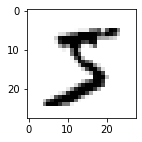

5

In [10]:
from matplotlib import pyplot as plt
def plot_image(image):
    fig = plt.gcf() # 設定圖形大小
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary') # 以黑白灰階顯示
    plt.show()

plot_image(X_train_image[0])
y_train_label[0]

In [11]:
# 宣告用來觀看圖片及預測結果的 function
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    # images 數字影像, labels 真實的 label, prediction 預測結果
    # idx 從哪個位置開始顯示資料, num 要顯示的資料筆數 
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ", predict=" + str(prediction[idx])

        ax.set_title(title, fontsize=10)
        ax.set_xticks([]) # 設定不顯示刻度
        ax.set_yticks([])
        idx+=1
    plt.show()


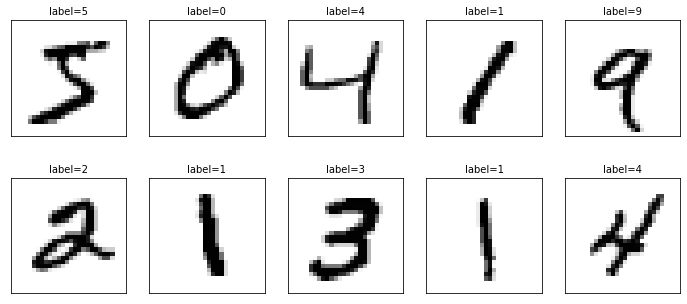

X_test_image:  (10000, 28, 28)
y_test_label:  (10000,)


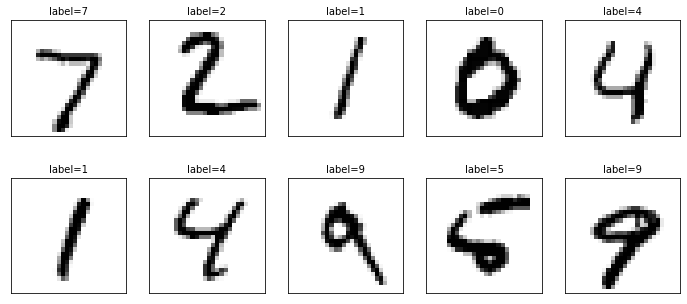

In [12]:
# 查看多筆訓練資料 images 與 label
import matplotlib.pyplot as plt

# 查看前十筆訓練資料
plot_images_labels_prediction(X_train_image, y_train_label, [], 0, 10)
# 查看測試資料
print('X_test_image: ', X_test_image.shape)
print('y_test_label: ', y_test_label.shape)
# 查看前十筆測試資料
plot_images_labels_prediction(X_test_image, y_test_label, [], 0, 10)

In [13]:
# features (訓練資料的特徵值)預處理
# 1. 將 28*28 的影像, reshape 為一維的向量, 長度變為 784, 並且轉換為 float
x_Train = X_train_image.reshape(60000, 784).astype('float32')
x_Test = X_test_image.reshape(10000, 784).astype('float32')
print('x_Train:', x_Train.shape)
print('x_Test', x_Test.shape)
# 2. 將數字影像 image 的數字標準化
# 數字標準化, 可以提高後續訓練模型的準確率
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

# labels (真實的值)預處理
# one-hot encoding
# ex: 7 變為 00000001000 剛好對應 輸出層的 10個神經元
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)


x_Train: (60000, 784)
x_Test (10000, 784)


In [14]:
# 建立模型
# 輸入層(x) 共有 784 個神經元
# 隱藏層(h1) 共有 256 個神經元
# 輸出層(y) 共有 10 個神經元
from keras.models import Sequential
from keras.layers import Dense

# 建立線性堆疊模型
model = Sequential()

# 建立並增加 輸入層(x) 及 隱藏層 (h1)
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# kernel_initializer 使用 normal distribution 常態分佈的亂數, 初始化 weight(權重) 和 bias (偏差)

# 建立輸出層 輸出層(y)
# 不指定 input_dim, 會自己根據上一層的 unit(256), 設定這一層的 input_dim 為 256
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 查看模型摘要
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


2022-05-10 17:26:36.195143: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-10 17:26:36.197805: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [15]:
# 新增一個 function, 用來以圖像方式顯示 train_history
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # train: 訓練資料的執行結果
    # validation: 驗證資料的執行結果

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4383 - accuracy: 0.8829 - val_loss: 0.2183 - val_accuracy: 0.9405
Epoch 2/10
 - 2s - loss: 0.1912 - accuracy: 0.9455 - val_loss: 0.1559 - val_accuracy: 0.9553
Epoch 3/10
 - 2s - loss: 0.1356 - accuracy: 0.9617 - val_loss: 0.1262 - val_accuracy: 0.9651
Epoch 4/10
 - 2s - loss: 0.1029 - accuracy: 0.9702 - val_loss: 0.1119 - val_accuracy: 0.9685
Epoch 5/10
 - 2s - loss: 0.0812 - accuracy: 0.9772 - val_loss: 0.0983 - val_accuracy: 0.9719
Epoch 6/10
 - 2s - loss: 0.0661 - accuracy: 0.9819 - val_loss: 0.0936 - val_accuracy: 0.9722
Epoch 7/10
 - 2s - loss: 0.0545 - accuracy: 0.9851 - val_loss: 0.0912 - val_accuracy: 0.9738
Epoch 8/10
 - 2s - loss: 0.0460 - accuracy: 0.9876 - val_loss: 0.0836 - val_accuracy: 0.9758
Epoch 9/10
 - 2s - loss: 0.0383 - accuracy: 0.9900 - val_loss: 0.0825 - val_accuracy: 0.9764
Epoch 10/10
 - 2s - loss: 0.0318 - accuracy: 0.9916 - val_loss: 0.0814 - val_accuracy: 0.9764


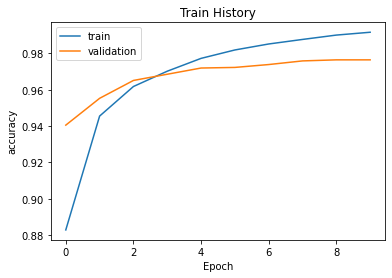

In [16]:
# 進行訓練
# 定義模型的訓練方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss: 設定損失參數(loss function), 
# optimizer: 設定訓練時的最佳化方法
# metrics: 設定用何種方式來評估模型

# 開始訓練
train_history = model.fit(x=x_Train_normalize,
                          y=y_TrainOneHot, validation_split=0.2,
                          epochs=10, batch_size=200, verbose=2)
# x: features, y: labels
# validation_split: 設定訓練資料與驗證資料的比例(0.2即表示驗證資料 20%)
# epochs: 執行幾個訓練週期
# batch_size: 每一批次訓練幾筆 
# verbose: 顯示訓練過程

# 資料總共 60000萬筆, 分成訓練資料 48000 + 驗證資料 12000
# 48000筆, 每一批次訓練 200筆, 分成 48000/200 = 240批次訓練

show_train_history(train_history, 'accuracy', 'val_accuracy')

In [17]:
# 以測試資料評估模型準確率
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 52us/step

accuracy= 0.9757999777793884


[7 2 1 ... 4 5 6]
error= 2.37


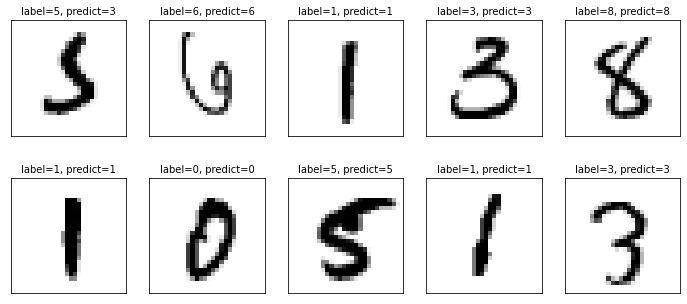

In [20]:
# 進行預測
prediction = model.predict_classes(x_Test)
prediction
print(prediction)
predict_array = np.array(prediction)
actual_array = np.array(y_test_label)
error = np.mean(predict_array != actual_array)
print('error=', error*100)
plot_images_labels_prediction(X_test_image, y_test_label, prediction, idx=340)